## Практическое задание 3. Градиентный спуск своими руками

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

## Реализация градиентного спуска

**Напоминание:** 

MSE в матричном виде: $Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)$ ($\ell$ - кол-во объектов)

Тогда его градиент будет: $\triangledown_wQ = \dfrac{-2}{\ell}X^T\big(y - Xw\big)$

**Бонус (0.5 балла)** Выведите эту формулу для градиента MSE.

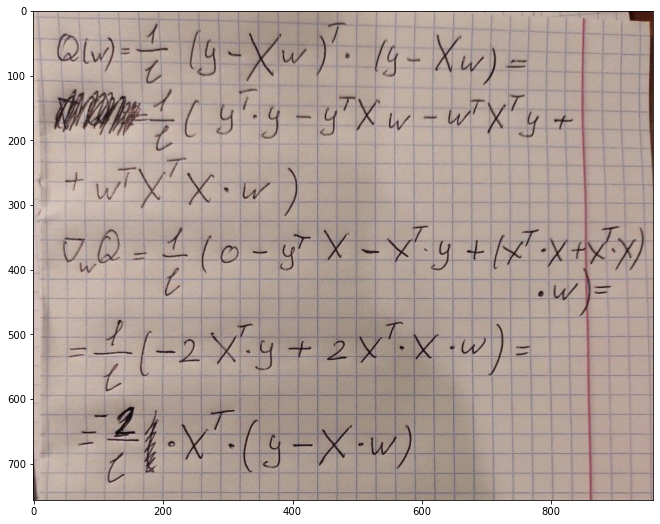

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(12,9))
img=mpimg.imread('GGraaaaaadddd.jpg')
imgplot = plt.imshow(img)

Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью:

**Задание 1 (1 балл)** Градиентного спуска;

**Задание 2 (1.5 балла)** Стохастического градиентного спуска;

**Задание 3 (2.5 балла)** Метода Momentum.


Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором. 


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

In [2]:
import numpy as np
from sklearn.base import BaseEstimator
from numpy import random

class LinearReg(BaseEstimator):
    def __init__(self, gd_type='full', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic' or 'momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.h = None # введём коэффициент h для momentum
    
    def fit(self, X, y):
        """
        функция обучения
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        if self.w0 == None:
            self.w0 = np.zeros(X.shape[1])
            self.w = self.w0
        if self.h == None:
            self.h = np.zeros(X.shape[1])       
            
        self.loss_history = []
        iterator = 0
        w_prev = 0
        #╰( ͡° ͜ʖ ͡° )つ──☆*:
        
        # обучение для полного градиентного сппуска   
        if(self.gd_type == 'full'):
            while (iterator < self.max_iter):
                self.loss_history.append(self.calc_loss(X, y))
                self.w = self.w - self.eta * self.calc_gradient(X, y)
                if (np.linalg.norm(w_prev - self.w) < self.tolerance):
                    print(f"Успех! Итерация: {iterator}; Loss: {self.loss_history[iterator]};")
                    break
                    
                w_prev = self.w
                if(iterator % 50 == 0):
                    print(f"Итерация: {iterator}; Loss: {self.loss_history[iterator]};")
                iterator += 1
                
        # обучение для стохастического градиентного сппуска        
        elif(self.gd_type == 'stochastic'):
            rand_obj = np.random.default_rng()
            
            while (iterator < self.max_iter):
                rand_num = rand_obj.integers(low=0, high = X.shape[0])
                
                self.loss_history.append(self.calc_loss(X, y))
                self.w = self.w - self.eta * self.calc_gradient(X[rand_num], y[rand_num])
                if (np.linalg.norm(w_prev - self.w) < self.tolerance):
                    print(f"Успех! Итерация: {iterator}; Loss: {self.loss_history[iterator]};")
                    break
                    
                w_prev = self.w
                if(iterator % 100 == 0):
                    print(f"Итерация: {iterator}; Loss: {self.loss_history[iterator]};")
                iterator += 1
                
                
        # обучение для полного градиентного спуска с momentum      
        elif(self.gd_type == 'momentum'):
            rand_obj = np.random.default_rng()
            
            while (iterator < self.max_iter):
                                
                self.loss_history.append(self.calc_loss(X, y))
                
                self.h = self.alpha * self.h + self.eta * self.calc_gradient(X, y)
                
                self.w = self.w - self.h
                if (np.linalg.norm(w_prev - self.w) < self.tolerance):
                    print(f"Успех! Итерация: {iterator}; Loss: {self.loss_history[iterator]};")
                    break
                    
                w_prev = self.w
                if(iterator % 50 == 0):
                    print(f"Итерация: {iterator}; Loss: {self.loss_history[iterator]};")
                iterator += 1            
                
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        else:
            result = X @ self.w
            
            return result
        
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        if (self.gd_type in ['full','momentum']):
            Q_grad = - 2 / X.shape[0] * X.T @(y - X @ self.w)
            return Q_grad
            
        elif (self.gd_type in ['stochastic']):
            Q_grad = - 2 / X.shape[0] * X.T * (y - np.dot(X , self.w))
            return Q_grad           
         
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """ 
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        Q = 1 / X.shape[0] * (y - X @ self.w.T ).T @ (y - X @ self.w.T)
        
        return Q

**Задание 4 (0 баллов)**. 
* Загрузите данные из домашнего задания 2 ([train.csv](https://www.kaggle.com/c/nyc-taxi-trip-duration/data));
* Разбейте выборку на обучающую и тестовую в отношении 7:3 с random_seed=0;
* Преобразуйте целевую переменную `trip_duration` как $\hat{y} = \log{(y + 1)}$.

In [3]:
# функция для подготовки дата сета
def prepare_X_and_y(X_fresh):
    X = X_fresh.drop(["dropoff_datetime"], axis=1)
    X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
    
    # сортируем выборку по дате
    X_sorted = X.sort_values(by='pickup_datetime').reset_index(drop=True)
    
    # преобразуем trip_duration
    y = np.log1p(X_sorted['trip_duration'])
    
    # достаём необходимые признаки аналогично hw_2
    X_sorted['only_date'] = pd.to_datetime(X_sorted['pickup_datetime']).dt.date
    X_sorted['month'] = pd.to_datetime(X_sorted['pickup_datetime']).dt.month
    X_sorted['dayofyear'] = pd.to_datetime(X_sorted['pickup_datetime']).dt.dayofyear
    X_sorted['day_week'] = pd.to_datetime(X_sorted['only_date']).dt.day_of_week
    X_sorted['hour'] = pd.to_datetime(X_sorted['pickup_datetime']).dt.hour
    
    # чистка данных аналогично hw_2
    X_sorted = X_sorted.drop(columns=[ 'id','vendor_id','passenger_count','pickup_datetime', 
                                      'pickup_longitude', 'pickup_latitude','dropoff_longitude',
                                      'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
                                      'only_date'])
    
    # масштабируем
    scaler = StandardScaler()
    X_sorted[['month','dayofyear']] = scaler.fit_transform(X_sorted[['month','dayofyear']]) 
    
    return X_sorted, y

In [4]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_fresh = pd.read_csv("train.csv")
# выделяем тренировочную и тестовую выборки test_size = 0.3, random_state=0
X_fresh_train, X_fresh_test = train_test_split(X_fresh, test_size=0.3, random_state=42, shuffle=False )

# подготавливаем выборку к ohe
X_train, y_train = prepare_X_and_y(X_fresh_train)
X_test, y_test = prepare_X_and_y(X_fresh_test)

X_train.head()

,month,dayofyear,day_week,hour
0,-1.496828,-1.760945,4,0
1,-1.496828,-1.760945,4,0
2,-1.496828,-1.760945,4,0
3,-1.496828,-1.760945,4,0
4,-1.496828,-1.760945,4,0


In [5]:
# ohe кодирвоание
ohe = ColumnTransformer([("Hot one", OneHotEncoder(sparse=False),[2,3])], remainder='passthrough')
X_train = ohe.fit_transform(X_train)
X_test = ohe.fit_transform(X_test)
print(X_train)

[[ 0.          0.          0.         ...  0.         -1.49682769
  -1.76094549]
 [ 0.          0.          0.         ...  0.         -1.49682769
  -1.76094549]
 [ 0.          0.          0.         ...  0.         -1.49682769
  -1.76094549]
 ...
 [ 0.          0.          0.         ...  1.          1.47822765
   1.74955689]
 [ 0.          0.          0.         ...  1.          1.47822765
   1.74955689]
 [ 0.          0.          0.         ...  1.          1.47822765
   1.74955689]]


**Задание 5 (3 балла)**. Обучите и провалидируйте модели на данных из предыдущего пункта, сравните качество между методами по метрикам MSE и $R^2$. Исследуйте влияние параметров `max_iter` и `eta` (`max_iter`, `alpha` и `eta` для Momentum) на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

**Ответ** Изменяя learning rate, мы можем сделать нашу модель либо слишком медленно обучаемой, либо нестабильной. Инцерция так же может сильно влиять на обуение, а именно замедлять обучение модели.

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# поолный градиент
full_grad1 = LinearReg(max_iter=1000, eta=0.5).fit(X_train, y_train)

Итерация: 0; Loss: 42.45352800306765;
Итерация: 50; Loss: 0.6391540628033396;
Итерация: 100; Loss: 0.6261733455498194;
Итерация: 150; Loss: 0.6234540799589514;
Итерация: 200; Loss: 0.6227414491126992;
Итерация: 250; Loss: 0.6225364890351759;
Итерация: 300; Loss: 0.6224746233401675;
Итерация: 350; Loss: 0.6224554103527818;
Итерация: 400; Loss: 0.6224493327118832;
Итерация: 450; Loss: 0.6224473857543582;
Успех! Итерация: 474; Loss: 0.6224469969124207;


In [8]:
full_grad2 = LinearReg(gd_type='stochastic',max_iter=1000, eta=0.5).fit(X_train, y_train)

Итерация: 0; Loss: 42.45352800306765;
Итерация: 100; Loss: 14.149814265339021;
Итерация: 200; Loss: 5.025115490636196;
Итерация: 300; Loss: 2.3040677014354376;
Итерация: 400; Loss: 1.211842598904953;
Итерация: 500; Loss: 0.9279535594005143;
Итерация: 600; Loss: 0.8168219358904838;
Итерация: 700; Loss: 0.8053530575894259;
Итерация: 800; Loss: 0.7290755251248247;
Итерация: 900; Loss: 0.7021271741446052;


In [ ]:
grad_3 = LinearReg(gd_type='momentum',max_iter=1000, eta=0.5, alpha=0.01)
full_grad3 = grad_3.fit(X_train, y_train)


Итерация: 0; Loss: 42.45352800306765;
Итерация: 50; Loss: 0.6385771080281041;
Итерация: 100; Loss: 0.6259928048946336;
Итерация: 150; Loss: 0.6233972584977071;
Итерация: 200; Loss: 0.6227228374376854;
Итерация: 250; Loss: 0.6225301935226608;
Итерация: 300; Loss: 0.6224724475681924;
Итерация: 350; Loss: 0.6224546483030066;
Итерация: 400; Loss: 0.622449063786882;


6.466425129397768

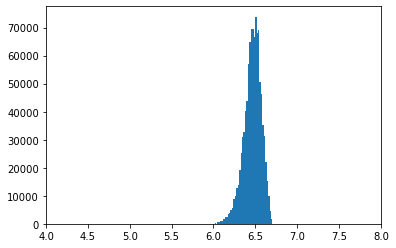

In [10]:
abc = grad_3.predict(X_test);
plt.hist(abc,bins=40);

plt.xlim(4,8)
np.mean(abc)

6.467232227676089

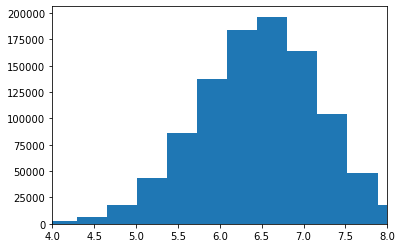

In [11]:
plt.hist(y_train,bins=40);
plt.xlim(4,8)
np.mean(y_test)

Близки по среднему значению (матожиданию), но дисперсии разные.... не могу сказать верно получилось или нет =(

**Задание 6 (2 балла)**. Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом Momentum. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны получиться *красивые* графики!

Text(0.5, 1.0, 'Зависимость ошибки сходимости от числа итераций различных вариантов градиентного спуска')

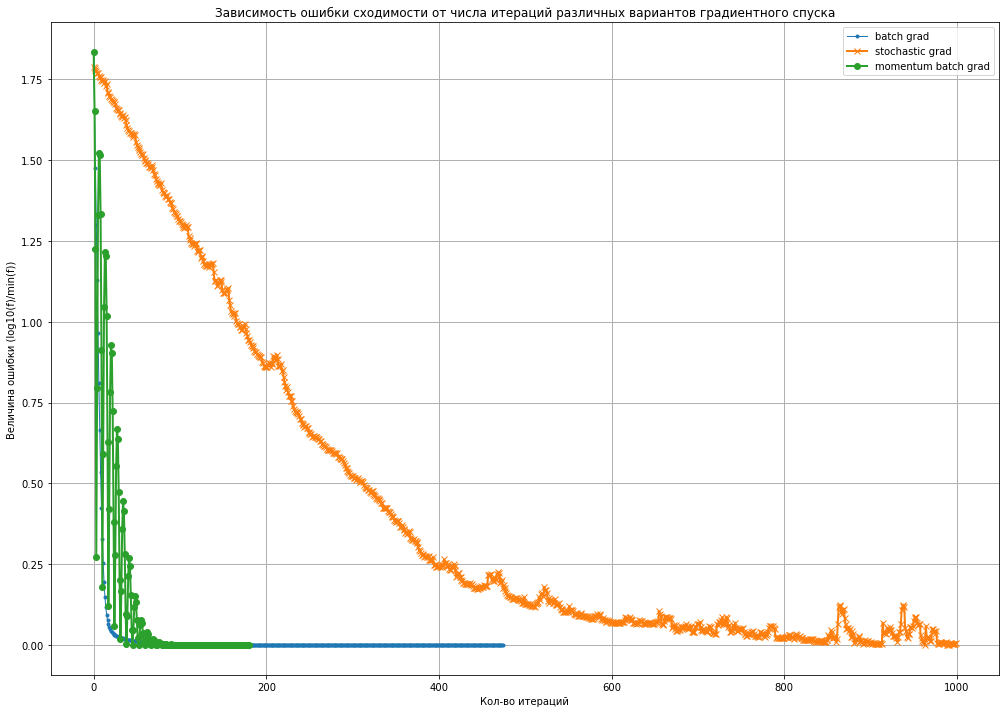

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
x1 = np.log10(full_grad1.loss_history/np.min(full_grad1.loss_history))
x2 = np.log10(full_grad2.loss_history/np.min(full_grad2.loss_history))
x3 = np.log10(full_grad3.loss_history/np.min(full_grad3.loss_history))

plt.figure(figsize=(17,12))
plt.plot(x1, marker=".", linewidth=1 )
plt.plot(x2, marker="x", linewidth=2)
plt.plot(x3, marker="o", linewidth=2)
plt.grid( linestyle='-', linewidth=1, which='both')
plt.xlabel("Кол-во итераций")
plt.ylabel("Величина ошибки (log10(f)/min(f))")
plt.legend(['batch grad', 'stochastic grad', 'momentum batch grad'])
plt.title("Зависимость ошибки сходимости от числа итераций различных вариантов градиентного спуска")
#plt.ylim([-0.25, 1.75])

На графике видно, что по кол-ву итераций самая бустрая сходимость у граидентного спуска с инерцией. Стохастический градиентный спуск сходится  медленне (и менее пплавно, условно сходимость наступает для некоторой окресности) по числу итераций, однако, время на одну итерацию значительно меньше.

### Бонус 

**Задание 7 (2 балла)**. Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью метода
[Adam](https://arxiv.org/pdf/1412.6980.pdf) - добавьте при необходимости параметры в класс модели, повторите пункты 5 и 6 и сравните результаты. 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 8 (2 балла)**. Реализуйте линейную регрессию с функцией потерь
$$ L(\hat{y}, y) = log(cosh(\hat{y} - y)),$$

обучаемую с помощью градиентного спуска.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 9 (0.01 балла)**.  Вставьте картинку с вашим любимым мемом в этот Jupyter Notebook

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ